# Regression Model

In [2]:
# Linear Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [4]:
x, y

(array([[ 5],
        [15],
        [25],
        [35],
        [45],
        [55]]),
 array([ 5, 20, 14, 32, 22, 38]))

In [5]:
model = LinearRegression()

In [6]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
model = LinearRegression().fit(x, y)

In [8]:
r_sq = model.score(x, y)

print(r_sq)

0.715875613747954


In [9]:
# yhat = b0 + b1 x

print('intercept (b0):', model.intercept_)
print('slope(b1):', model.coef_)

intercept (b0): 5.633333333333329
slope(b1): [0.54]


In [21]:
y_pred = model.predict(x)
print('predicted response:', y_pred)

predicted response: [ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [22]:
model.intercept_ + model.coef_ * 66

array([41.27333333])

In [23]:
model.predict([[66]])

array([41.27333333])

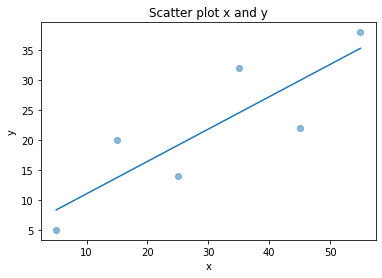

In [24]:
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred)
plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Multiple Linear Regression

In [25]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]

In [27]:
x, y = np.array(x), np.array(y)

In [28]:
x, y

(array([[ 0,  1],
        [ 5,  1],
        [15,  2],
        [25,  5],
        [35, 11],
        [45, 15],
        [55, 34],
        [60, 35]]),
 array([ 4,  5, 20, 14, 32, 22, 38, 43]))

In [29]:
model = LinearRegression()

In [30]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
r_sq = model.score(x, y)

In [32]:
print('R2:', r_sq)
print('B0:', model.intercept_)
print('B1:', model.coef_)

R2: 0.8615939258756776
B0: 5.52257927519819
B1: [0.44706965 0.25502548]


In [33]:
y_pred = model.predict(x)
print('predict response:', y_pred)

predict response: [ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [34]:
model.predict([[ 20, 100]])

array([39.96652039])

In [35]:
x_new = np.arange(10).reshape((-1, 2))

In [36]:
x_new

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [37]:
model.predict(x_new)

array([ 5.77760476,  7.18179502,  8.58598528,  9.99017554, 11.3943658 ])

# Polynomial Regression

In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [43]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

In [44]:
x, y

(array([[ 5],
        [15],
        [25],
        [35],
        [45],
        [55]]),
 array([15, 11,  2,  8, 25, 32]))

In [65]:
# Transform Data

transformer = PolynomialFeatures(degree=2, include_bias=False)

In [69]:
transformer.fit(x)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [70]:
x_ = transformer.transform(x)

In [71]:
x_

array([[0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [5.000e+00, 1.000e+00, 2.500e+01, 5.000e+00, 1.000e+00],
       [1.500e+01, 2.000e+00, 2.250e+02, 3.000e+01, 4.000e+00],
       [2.500e+01, 5.000e+00, 6.250e+02, 1.250e+02, 2.500e+01],
       [3.500e+01, 1.100e+01, 1.225e+03, 3.850e+02, 1.210e+02],
       [4.500e+01, 1.500e+01, 2.025e+03, 6.750e+02, 2.250e+02],
       [5.500e+01, 3.400e+01, 3.025e+03, 1.870e+03, 1.156e+03],
       [6.000e+01, 3.500e+01, 3.600e+03, 2.100e+03, 1.225e+03]])

In [50]:
model = LinearRegression()

In [51]:
model.fit(x_, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
r_sq = model.score(x_, y)
print('R2:', r_sq)
print('B0:', model.intercept_)
print('B1:', model.coef_)

R2: 0.8908516262498564
B0: 21.372321428571425
B1: [-1.32357143  0.02839286]


In [54]:
x_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)

In [55]:
x_

array([[1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 5.500e+01, 3.025e+03]])

In [56]:
model = LinearRegression(fit_intercept=True).fit(x_, y)

In [57]:
r_sq = model.score(x_, y)
print('R2:', r_sq)
print('B0:', model.intercept_)
print('B1:', model.coef_)

R2: 0.8908516262498565
B0: 21.37232142857144
B1: [ 0.         -1.32357143  0.02839286]


In [58]:
y_pred = model.predict(x_)
print('predicted response:', y_pred)

predicted response: [15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


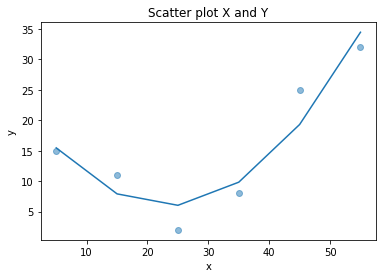

In [59]:
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred)
plt.title('Scatter plot X and Y')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [60]:
# Step 1: Import packages
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 2a: Provide data
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

# Step 2b: Transform input data
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

# Step 3: Create a model and fit it
model = LinearRegression().fit(x_, y)

# Step 4: Get results
r_sq = model.score(x_, y)
intercept, coefficients = model.intercept_, model.coef_

# Step 5: Predict
y_pred = model.predict(x_)

In [72]:
print('coefficient of determination:', r_sq)
print('intercept:', intercept)
print('coefficients:', coefficients, sep='\n')
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.9453701449127822
intercept: 0.8430556452395734
coefficients:
[ 2.44828275  0.16160353 -0.15259677  0.47928683 -0.4641851 ]
predicted response:
[ 0.54047408 11.36340283 16.07809622 15.79139    29.73858619 23.50834636
 39.05631386 41.92339046]


# Linear Regression with Statsmodel

In [73]:
import numpy as np
import statsmodels.api as sm

In [74]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [75]:
x, y

(array([[ 0,  1],
        [ 5,  1],
        [15,  2],
        [25,  5],
        [35, 11],
        [45, 15],
        [55, 34],
        [60, 35]]),
 array([ 4,  5, 20, 14, 32, 22, 38, 43]))

In [76]:
x = sm.add_constant(x)

In [78]:
print(x)
print(y)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
[ 4  5 20 14 32 22 38 43]


In [81]:
model = sm.OLS(y, x)

In [82]:
result = model.fit()

In [83]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Sat, 13 Jun 2020   Prob (F-statistic):            0.00713
Time:                        15:17:40   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [84]:
print('R2:', result.rsquared)
print(result.rsquared_adj)
print(result.params)

R2: 0.8615939258756777
0.8062314962259488
[5.52257928 0.44706965 0.25502548]


In [85]:
result.fittedvalues

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

In [87]:
result.predict(x)

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

# Implementing Linear Regression on Real Dataset

In [88]:
import statsmodels.api as sm
from sklearn import datasets

In [89]:
data = datasets.load_boston()  # liat di scikit-learn.org

In [90]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [91]:
import numpy as np
import pandas as pd

In [92]:
df = pd.DataFrame(data.data, columns=data.feature_names)

target = pd.DataFrame(data.target, columns=["MEDV"])

In [93]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [94]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [104]:
X = df["RM"]
y = target["MEDV"]

In [106]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Sat, 13 Jun 2020   Prob (F-statistic):                   3.74e-256
Time:                        15:40:10   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

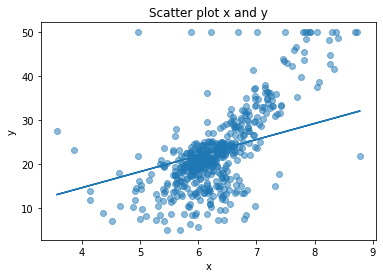

In [103]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X, predictions)
plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [107]:
from sklearn import linear_model

In [108]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library

In [109]:
df = pd.DataFrame(data.data, columns=data.feature_names)

target = pd.DataFrame(data.target, columns=['MEDV'])

In [110]:
X = df
y = target['MEDV']

In [111]:
Im = linear_model.LinearRegression()

In [112]:
Im.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
Im.score(X, y)

0.7406426641094095

In [114]:
## Example 2

In [117]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv', usecols=['horsepower', 'price'])

In [119]:
df

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0
...,...,...
200,114,16845.0
201,160,19045.0
202,134,21485.0
203,106,22470.0


In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [121]:
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [123]:
model = LinearRegression()

In [124]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
model.score(x_train, y_train)

0.654363025956544

In [126]:
y_pred = model.predict(x_test)

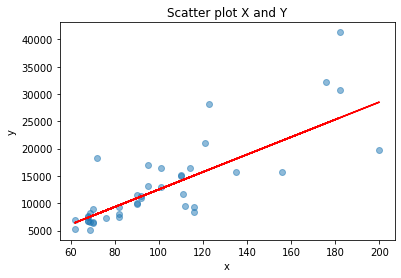

In [127]:
plt.scatter(x_test, y_test, alpha=0.5)
plt.plot(x_test, y_pred, c='r')
plt.title('Scatter plot X and Y')
plt.xlabel('x')
plt.ylabel('y')

plt.show()